Column Names: Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


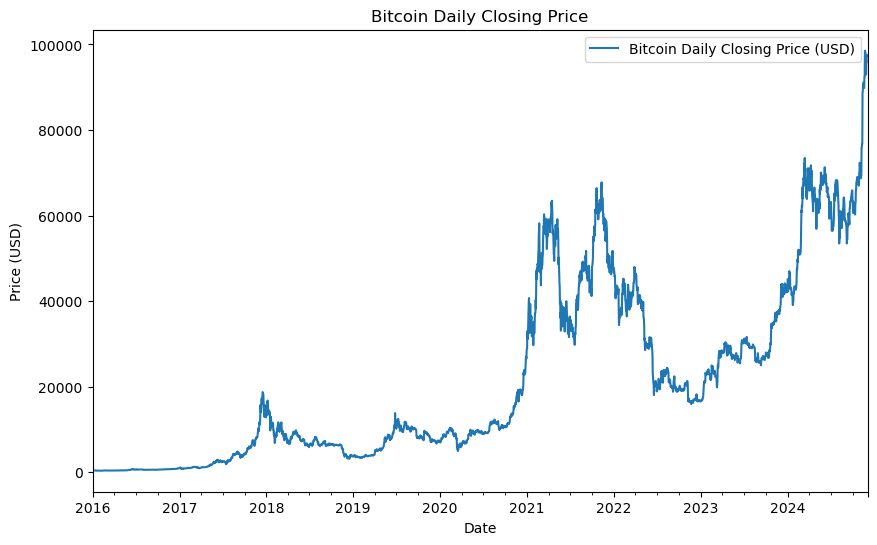

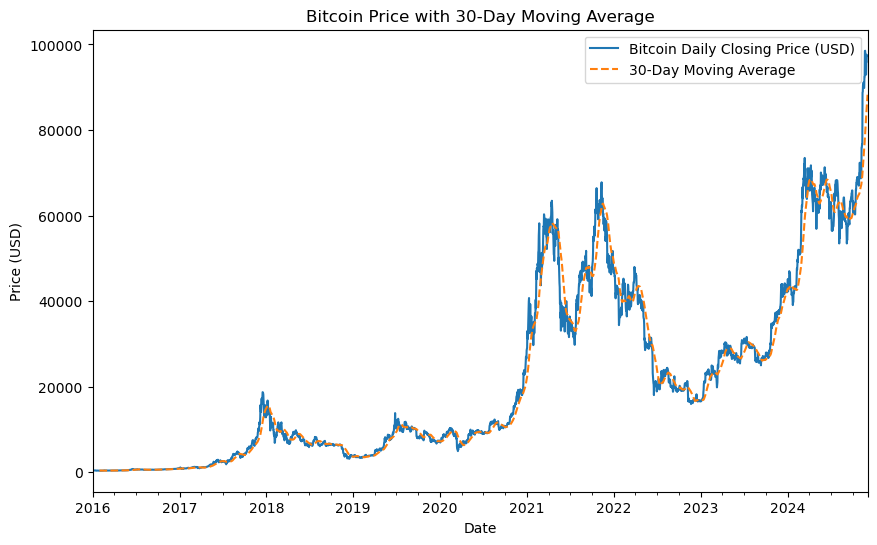

NameError: name 'time_index' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/christophersalapare/Downloads/btcusd_1-min_data.csv')

print("Column Names:", df.columns)

df['timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

df = df[df['timestamp'] >= '2016-01-01']

df = df.dropna(subset=['Close'])
df = df[df['Close'] > 0]  

df.set_index('timestamp', inplace=True)
daily_data = df['Close'].resample('D').last()  

plt.figure(figsize=(10, 6))
daily_data.plot(label='Bitcoin Daily Closing Price (USD)')
plt.title("Bitcoin Daily Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

moving_avg = daily_data.rolling(window=30).mean()  

plt.figure(figsize=(10, 6))
daily_data.plot(label='Bitcoin Daily Closing Price (USD)')
moving_avg.plot(label='30-Day Moving Average', linestyle='--')
plt.title("Bitcoin Price with 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

def fit_logistic_growth(t, y):
    
    def residuals(params):
        L, k, t0 = params
        model = logistic_growth(t, L, k, t0)
        return np.sum((y - model) ** 2)

    L_init = max(y)
    k_init = 0.1
    t0_init = len(y) / 2
    initial_params = np.array([L_init, k_init, t0_init])

    
    best_params = initial_params
    best_error = residuals(initial_params)


    for L in np.linspace(L_init - 1000, L_init + 1000, 10):
        for k in np.linspace(k_init - 0.01, k_init + 0.01, 10):
            for t0 in np.linspace(t0_init - 50, t0_init + 50, 10):
                params = np.array([L, k, t0])
                error = residuals(params)
                if error < best_error:
                    best_error = error
                    best_params = params

    return best_params

logistic_params = fit_logistic_growth(time_index, daily_data)
print(f"Logistic Growth Parameters (L, k, t0): {logistic_params}")

plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data, label='Bitcoin Price (USD)', color='blue')

logistic_fit = logistic_growth(time_index, *logistic_params)
plt.plot(daily_data.index, logistic_fit, label='Logistic Growth Model', linestyle='--', color='red')

logistic_pred = logistic_growth(time_index, *logistic_params)
rmse_logistic = np.sqrt(np.mean((daily_data.values - logistic_pred) ** 2))
print(f"Logistic Growth Model RMSE: {rmse_logistic:.2f}")
